[View in Colaboratory](https://colab.research.google.com/github/peaelle42/DNN_jump_start/blob/master/JS03_04_MNIST_CNN_Calculating_the_parameters.ipynb)

## Testing for GPU

To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU
 

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### First we need to download the dependencies


In [3]:
!rm sutils.py
!rm gdrive.py
!rm notebook1.zip.1
!ls

rm: cannot remove 'sutils.py': No such file or directory
rm: cannot remove 'gdrive.py': No such file or directory
rm: cannot remove 'notebook1.zip.1': No such file or directory
datalab        diagram3c.gif  diagram5g.png  imdb_data	    solutions
diagram12.gif  diagram4f.png  diagram6d.png  notebook1.zip


In [4]:
!wget -qq https://www.dropbox.com/s/vj61417lofjebju/utils.zip


!unzip -qq utils.zip
!rm utils.zip
!rm -r __MACOSX

!ls


datalab        diagram4f.png  gdrive.py      solutions
diagram12.gif  diagram5g.png  imdb_data      sutils.py
diagram3c.gif  diagram6d.png  notebook1.zip


In [5]:
!ls

datalab        diagram4f.png  gdrive.py      solutions
diagram12.gif  diagram5g.png  imdb_data      sutils.py
diagram3c.gif  diagram6d.png  notebook1.zip


In [6]:
%matplotlib inline
from sutils import *
import os, json
from glob import glob

import tensorflow.python.keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten,Input
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K

Using TensorFlow backend.


In [0]:
limit_gpu_mem()

In [0]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [11]:
input_shape

(28, 28, 1)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Dropout(0.25,name = 'Dropout_01')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(128, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

In [0]:
model = Model(Inp,output)

## Calculating the number of parameters for Convolution Networks

Formula is (filters x (kernel_height x kernel_width) x inputs) 1 x filters = parameters

Conv_01 = 32 Filters , 3x3 Kernel = (32 x (3x3) x 1 input) + 1bias x filters = 320 parameters  
Conv_02 = 64 Filters , 3x3 Kernel = (64 x (3x3) x 32 inputs) + 1bias x filters = 18496 parameters 

Dense_1 = (9216 inputs * 128 units)+ 128 bias = 1,179,776  
Dense_2 = (128 inputs * 10 units) +10 bias = 1290


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Flatten_01 (Flatten)         (None, 9216)              0         
_________________________________________________________________
Dense_01 (Dense)             (None, 128)               1179776   
__________

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [18]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.2696 - acc: 0.9175 - val_loss: 0.0582 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0887 - acc: 0.9737 - val_loss: 0.0442 - val_acc: 0.9853
Epoch 3/10
26752/60000 [============>.................] - ETA: 5s - loss: 0.0696 - acc: 0.9799

60000/60000 [==============================] - 11s 178us/step - loss: 0.0666 - acc: 0.9802 - val_loss: 0.0378 - val_acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0549 - acc: 0.9830 - val_loss: 0.0339 - val_acc: 0.9895
Epoch 5/10
51584/60000 [========================>.....] - ETA: 1s - loss: 0.0461 - acc: 0.9866

60000/60000 [==============================] - 11s 176us/step - loss: 0.0466 - acc: 0.9863 - val_loss: 0.0292 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0409 - acc: 0.9878 - val_loss: 0.0307 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0259 - val_acc: 0.9917
Epoch 8/10
 2432/60000 [>.............................] - ETA: 9s - loss: 0.0354 - acc: 0.9897

60000/60000 [==============================] - 10s 171us/step - loss: 0.0346 - acc: 0.9894 - val_loss: 0.0274 - val_acc: 0.9906
Epoch 9/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0328 - acc: 0.9901 - val_loss: 0.0274 - val_acc: 0.9915
Epoch 10/10
54912/60000 [==========================>...] - ETA: 0s - loss: 0.0303 - acc: 0.9910

60000/60000 [==============================] - 10s 167us/step - loss: 0.0311 - acc: 0.9908 - val_loss: 0.0263 - val_acc: 0.9913


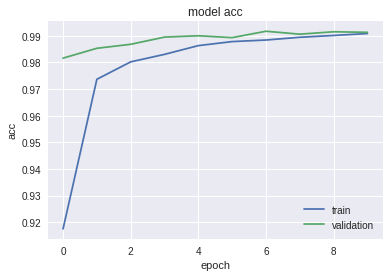

In [19]:
plot_train(hist)

In [0]:
model.save_weights('basic_cnn.h5')

In [0]:
model.save('mnist_cnn_model.h5')

In [0]:
!ls

In [0]:
import gdrive

In [23]:
gdrive.upload_file('basic_cnn.h5', 'application/h5')

File ID: 1ylbidOXjSf2UnQFOmS_fjPY1YpndAHDv


In [24]:
gdrive.upload_file('mnist_cnn_model.h5', 'application/h5')

File ID: 1p9QCmNQ9FB4SwMAlx6kFrjW7E1jvlahR


In [0]:
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Conv2D(128, (3, 3), activation='relu',name = 'Conv_03')(x)
x = Conv2D(256, (3, 3), activation='relu',name = 'Conv_04')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
x = Dropout(0.25,name = 'Dropout_01')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(128, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

In [0]:
model = Model(Inp,output)

## Calculating the number of parameters for Convolution Networks

Formula is (filters x (kernel_height x kernel_width) x inputs) 1 x filters = parameters

Conv_01 = 32 Filters , 3x3 Kernel = (32 x (3x3) x 1 input) + 1bias x filters = 320 parameters  
Conv_02 = 64 Filters , 3x3 Kernel = (64 x (3x3) x 32 inputs) + 1bias x filters = 18496 parameters   
Conv_03 = 128 Filters , 3x3 Kernel = (128 x (3x3) x 64 input) + 1bias x filters = 73856 parameters    
Conv_04 = 256 Filters , 3x3 Kernel = (256 x (3x3) x 128 inputs) + 1bias x filters = 295168 parameters 

Dense_1 = (4096 inputs * 128 units)+ 128 bias = 524,416  
Dense_2 = (128 inputs * 10 units) +10 bias = 1290

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 128)       73856     
_________________________________________________________________
Conv_04 (Conv2D)             (None, 8, 8, 256)         295168    
_________________________________________________________________
MaxPool_02 (MaxPooling2D)    (None, 4, 4, 256)         0         
__________